In [2]:
# Import necessary libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('code'))
from gradcam import *
from zipfile import ZipFile
from fastai.vision import * 
from fastai.metrics import error_rate
from PIL import Image
import matplotlib.pyplot as plt
# constants
path_img = 'images/data'

In [2]:
# Do initially to extract images from zip
with ZipFile('images/data_2.zip', 'r') as zip: 
    zip.extractall('images')

In [3]:
data = ImageDataBunch.from_folder(path_img, size=640, bs=8).normalize(imagenet_stats)
# data.show_batch(rows=4, figsize=(10,6))

epoch,train_loss,valid_loss,error_rate,time
0,1.465159,0.599901,0.208333,00:20
1,0.715391,0.341185,0.114583,00:11
2,0.404289,0.197915,0.072917,00:11
3,0.256189,0.238235,0.104167,00:11
4,0.220391,0.214426,0.093750,00:11
5,0.176618,0.150054,0.062500,00:12
6,0.188737,0.210187,0.072917,00:11
7,0.220242,0.115463,0.041667,00:11
8,0.139137,0.262002,0.072917,00:11
9,0.145790,0.124277,0.052083,00:11


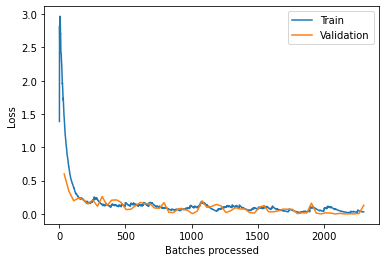

In [4]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit(64)
learn.recorder.plot_losses() 

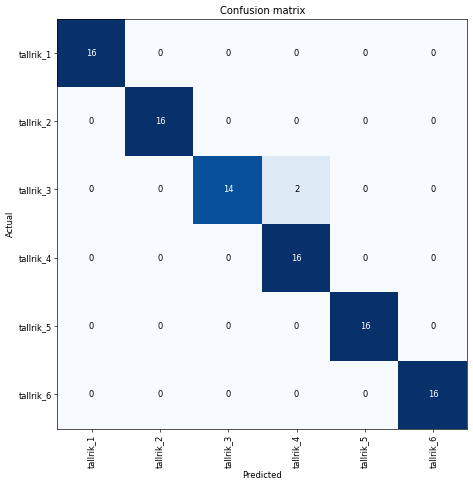

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

### GradCam images

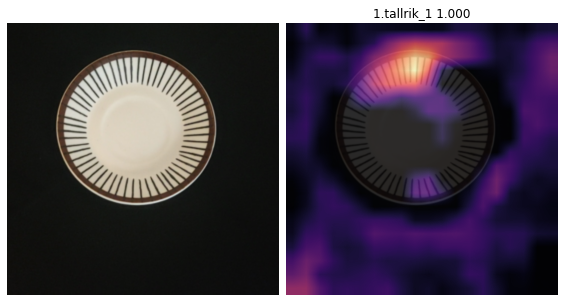

In [6]:
# Using one image from each validation set.
valid_plate_1 = open_image(path_img+'/valid/tallrik_1/1586527524387-0006.png');
gcam = GradCam.from_one_img(learn,valid_plate_1)
gcam.plot(plot_gbp=False)